# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
# Count the number of unique mice in the combined data
unique_mice_count = len(combined_data['Mouse ID'].unique())
unique_mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Identify duplicate entries based on 'Mouse ID' and 'Timepoint'
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_cleaned = len(clean_data['Mouse ID'].unique())
unique_mice_count_cleaned

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
advanced_summary_stats = clean_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
}).rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})
advanced_summary_stats

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.320930  50.446266  43.852013           6.622085   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

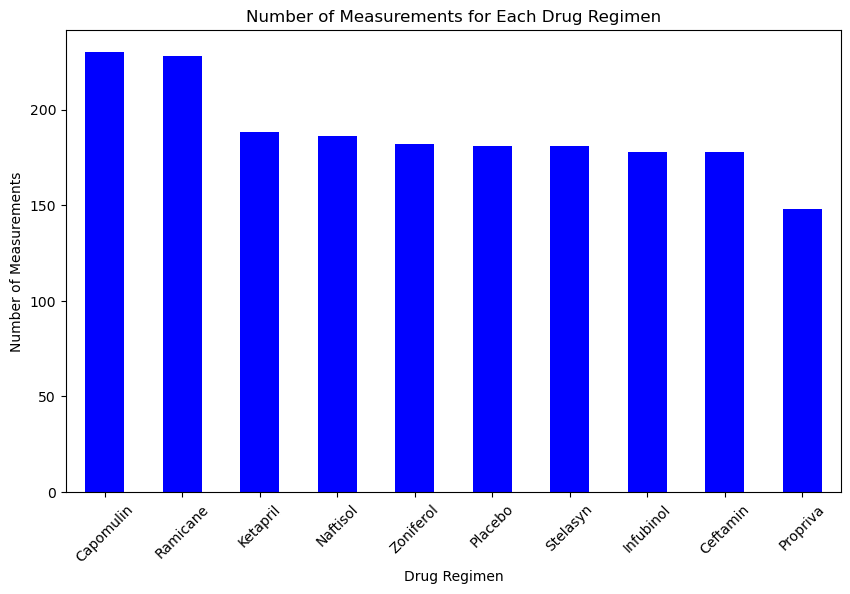

In [22]:
# Execute the code to generate a bar chart for the number of measurements for each drug regimen
measurement_count = clean_data['Drug Regimen'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
measurement_count.plot(kind='bar', color='blue')
plt.title('Number of Measurements for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=45)
plt.show()


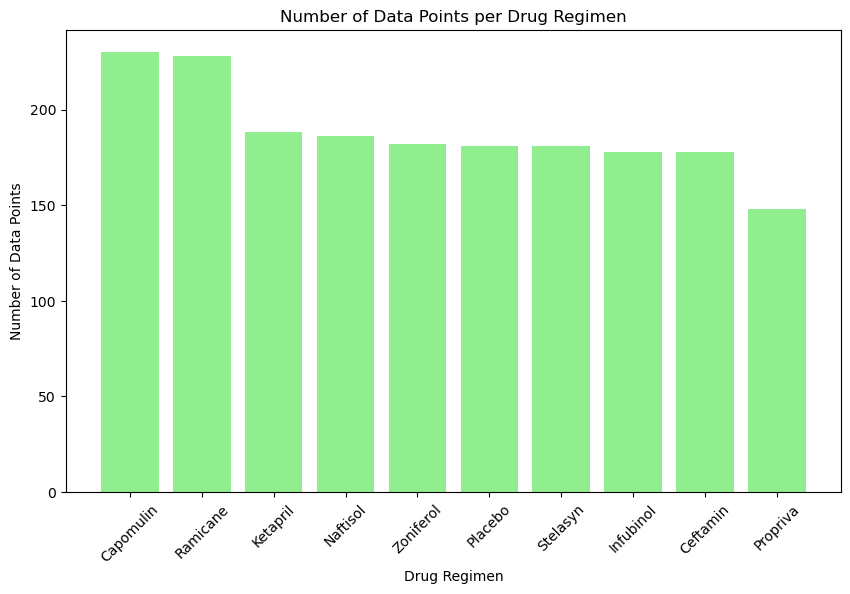

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Set up the figure and axis
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='lightgreen')
# Adding titles and labels
plt.title('Number of Data Points per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Kris\AppData\Local\Temp\ipykernel_30452\2142766494.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  pie_plot.figure.show()


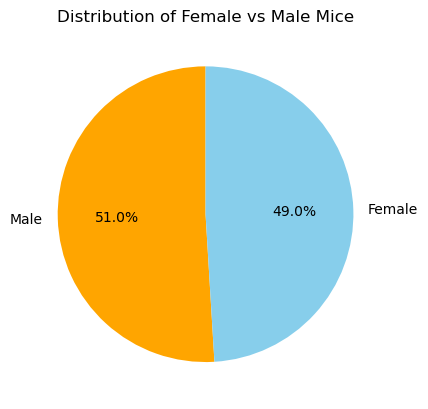

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of females and males
sex_distribution = clean_data['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot = sex_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['orange', 'skyblue'], 
title='Distribution of Female vs Male Mice')

# Hide the 'y' label
pie_plot.set_ylabel('')

# Display the pie plot
pie_plot.figure.show()

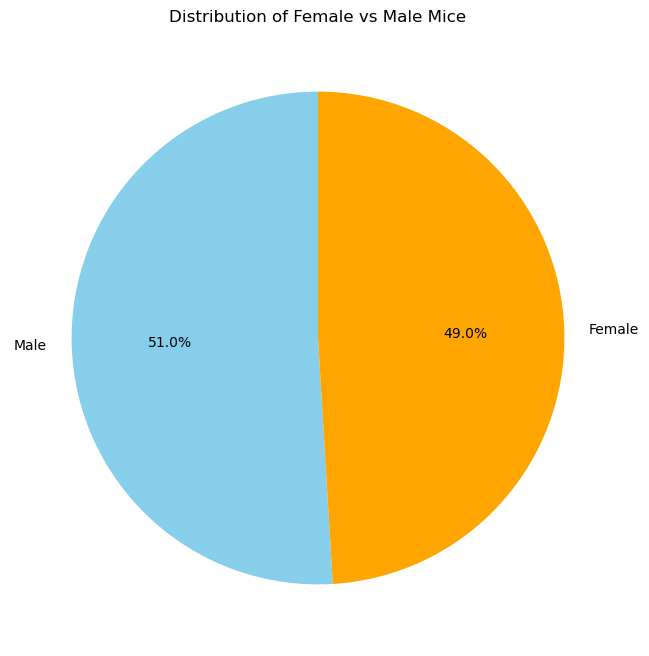

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', 
        startangle=90, colors=['skyblue', 'orange'])
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_data.groupby('Mouse ID').max()['Timepoint'].reset_index()
merged_df = pd.merge(last_timepoint_df, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drugs_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = merged_df[merged_df['Drug Regimen'].isin(drugs_of_interest)]


In [15]:
# Treatments list for for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to fill with tumor volume data
tumor_vol_data = []

# Dictionary to hold IQR data and potential outliers
treatment_analysis = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_vol_data.append(final_tumor_vol)
    
    # Calculate the IQR
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify any outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    # Add data to the analysis dictionary
    treatment_analysis[drug] = {
        'IQR': iqr,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers
    }




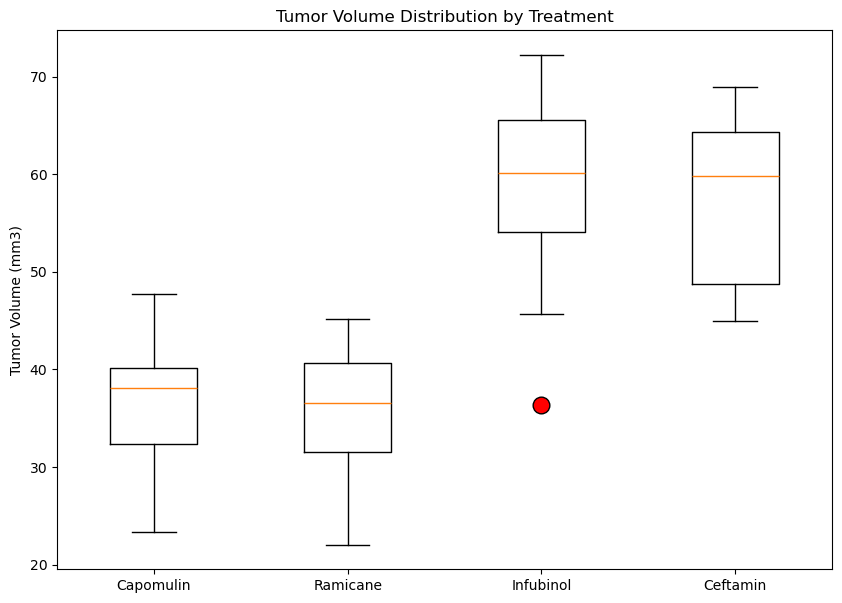

In [16]:
# Generate a box plot of the tumor volume for each treatment group
plt.figure(figsize=(10, 7))
plt.boxplot(tumor_vol_data, flierprops=dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none'))

# Add titles and labels
plt.title('Tumor Volume Distribution by Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], treatments)

# Show the plot
plt.show()


## Line and Scatter Plots

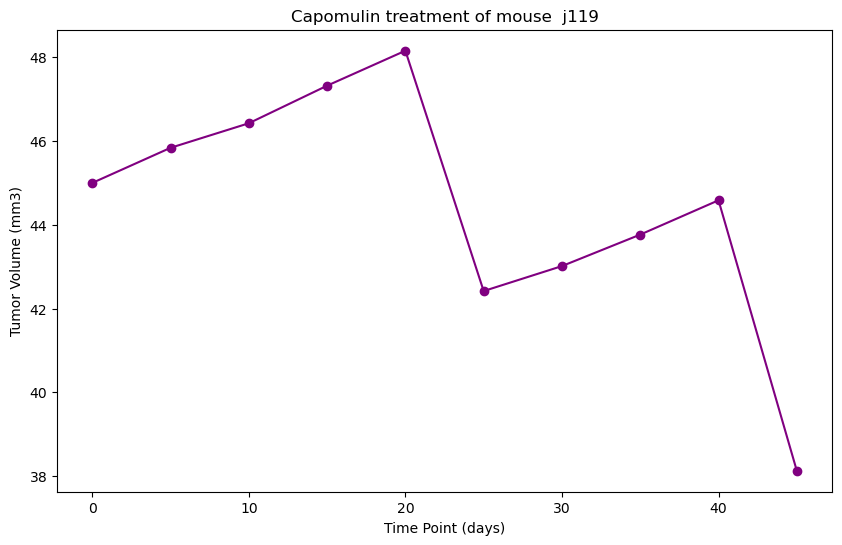

'j119'

In [19]:
# Filter data for Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Select a random mouse that was treated with Capomulin
random_mouse_id = random.choice(capomulin_data['Mouse ID'].unique())

# Get data for the randomly selected mouse
random_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == random_mouse_id]

# Generate a line plot of tumor volume vs. time point for the randomly selected mouse
plt.figure(figsize=(10, 6))
plt.plot(random_mouse_data['Timepoint'], random_mouse_data['Tumor Volume (mm3)'], marker='o', color='purple')
plt.title(f'Capomulin treatment of mouse  {random_mouse_id}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

# Return the selected mouse ID for reference
random_mouse_id






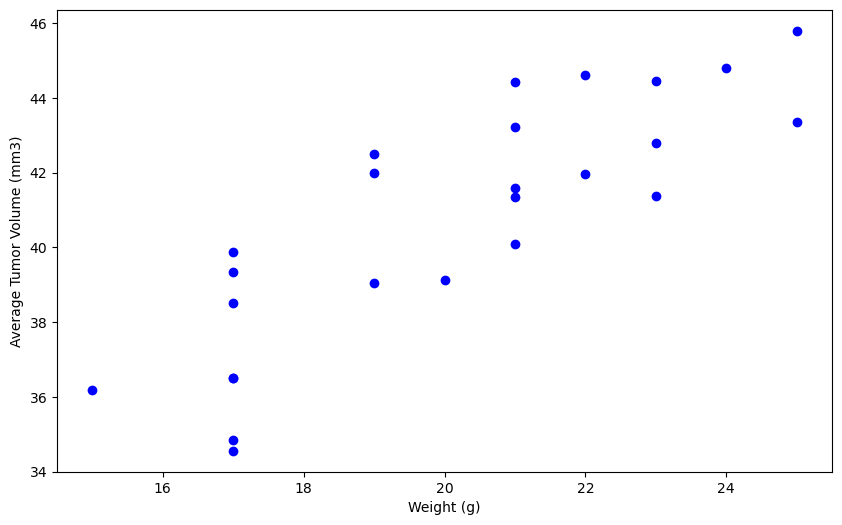

In [20]:
# Calculate the average tumor volume for each mouse under the Capomulin regimen
capomulin_avg = capomulin_data.groupby('Mouse ID').agg(
    Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean')
)

# Generate a scatter plot of mouse weight versus average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg['Weight'], capomulin_avg['Avg_Tumor_Volume'], color='blue')

# Adding labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression